In [68]:
#Install necessary libraries

#Van Rossum, G., & Drake, F. L. (2009). Python 3 Reference Manual. Scotts Valley, CA: CreateSpace. 

!sudo pip install -y --upgrade pip
!sudo apt-get -y update

#An open graph visualization system and its applications to software engineering, - Gansner, North - 2000
!sudo apt-get install -y graphviz

#Oliphant, T. E. (2006). A guide to NumPy (Vol. 1). Trelgol Publishing USA.
import numpy as np 

#Data structures for statistical computing in python, McKinney, Proceedings of the
#9th Python in Science Conference, Volume 445, 2010.
import pandas as pd 

#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
#Sentiment Analysis of Social Media Text. Eighth International Conference on
#Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
!sudo  pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
!sudo pip install sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split 

#Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, 
#Computing in Science and Engineering,vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. 
#URL: https://ipython.org
from IPython.display import Image


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y
Ign http://us-east-1.ec2.archive.ubuntu.com trusty InRelease
Hit http://us-east-1.ec2.archive.ubuntu.com trusty-updates InRelease
Ign http://cran.rstudio.com trusty/ InRelease
Hit http://us-east-1.ec2.archive.ubuntu.com trusty Release.gpg
Hit http://us-east-1.ec2.archive.ubuntu.com trusty Release
Hit http://cran.rstudio.com trusty/ Release.gpg
Hit http://cran.rstudio.com trusty/ Release
Hit http://us-east-1.ec2.archive.ubuntu.com trusty-updates/main Sources
Hit http://us-east-1.ec2.archive.ubuntu.com trusty-updates/universe Sources
Hit http://us-east-1.ec2.archive.ubuntu.com trusty-updates/main amd64 Packages
Hit http://us-east-1.ec2.archive.ubuntu.com trust

In [69]:
#read the csv file with the labeled stements into a dataframe for natural language processing
media=pd.read_csv('train.csv', parse_dates=True)

In [70]:
#create an analyser object
analyser = SentimentIntensityAnalyzer()

In [71]:
# separates the dataset into two dataframes- one for the staements 
# labeled true, and one for the statements labeled false
TrueStatements=media[media['Label']==True]
FalseStatements=media[media['Label']==False]

In [72]:
#function that uses the suggested sentiment thresholds from the VADER documentation  
#as an algorithm to predit if a given statement is true or false
def sentiment_truth_predictions(sentence):
    score = analyser.polarity_scores(sentence)
    if score['compound']>=.05 or score['compound']<=-.05:
        return False
    else:
        return True

In [73]:
#applies the prediction function to each row in each of the dataframes and saves the results in a new column
TrueStatements['sentimentTruthPrediction'] = TrueStatements['Statement'].apply(lambda x: sentiment_truth_predictions(x))
FalseStatements['sentimentTruthPrediction'] = FalseStatements['Statement'].apply(lambda x: sentiment_truth_predictions(x))

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
#prints the results of the algorithm using the suggest threshholds for the False Satements
print('Value Counts:')
print(FalseStatements['sentimentTruthPrediction'].value_counts())
print('Percentage:')
print(FalseStatements['sentimentTruthPrediction'].value_counts(normalize=True).mul(100))

Value Counts:
False    2890
True     1598
Name: sentimentTruthPrediction, dtype: int64
Percentage:
False    64.393939
True     35.606061
Name: sentimentTruthPrediction, dtype: float64


In [75]:
#prints the results of the algorithm using the suggest threshholds for the True Satements
print('Value Counts:')
print(TrueStatements['sentimentTruthPrediction'].value_counts())
print('Percentage:')
print(TrueStatements['sentimentTruthPrediction'].value_counts(normalize=True).mul(100))

Value Counts:
False    3756
True     1996
Name: sentimentTruthPrediction, dtype: int64
Percentage:
False    65.299026
True     34.700974
Name: sentimentTruthPrediction, dtype: float64


In [76]:
#functions that return the values of each VADER sentiment score 

def compound_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

def neutral_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['neu']

def positive_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['pos']

def negative_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['neg']

In [77]:
#remove the first prediction
TrueStatements=TrueStatements[['Statement','Label']]
FalseStatements=FalseStatements[['Statement','Label']]

In [78]:
#adds the VADER sentiment scores to the full dataframe
media['compoundScore'] = media['Statement'].apply(lambda x: compound_scores(x))
media['neutralScore'] = media['Statement'].apply(lambda x: neutral_scores(x))
media['positiveScore'] = media['Statement'].apply(lambda x: positive_scores(x))
media['negativeScore'] = media['Statement'].apply(lambda x: negative_scores(x))

In [79]:
#create decision tree classifier and set depth
tree = DecisionTreeClassifier(max_depth = 2)

In [80]:
#fit the tree with the predictors (['compoundScore','neutralScore'
#,'positiveScore','negativeScore']) and target value (['Label'])
tree.fit(media[['compoundScore','neutralScore','positiveScore','negativeScore']],media['Label'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
#set the appropriate names and source fields and export the tree vizualization
export_graphviz(
    tree,
    out_file = "media_tree.dot",
    feature_names = media.columns[2:6],
    class_names = ['False','True'],
    rounded = True,
    filled = True
)
!dot -Tpng media_tree.dot -o media_tree.png

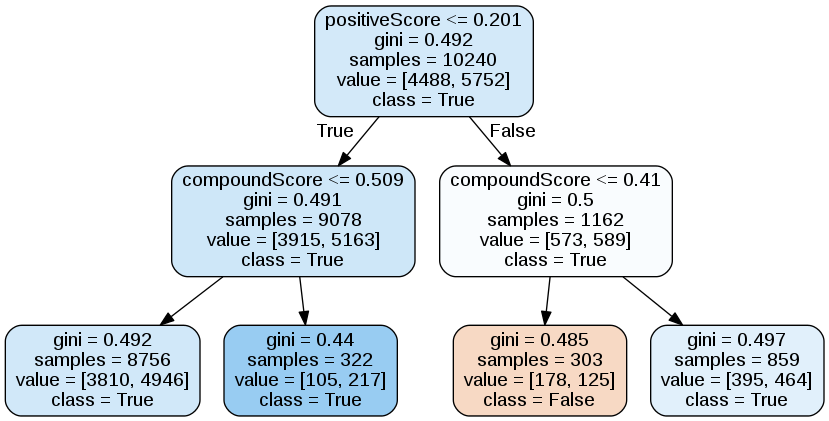

In [82]:
#display tree vizualization
Image(filename = 'media_tree.png')

In [83]:
#read dataset, clean up columns and column names and split into data frames of true and false statements
media2=pd.read_csv('FA-KES-Dataset.csv', parse_dates=True,encoding='latin-1')
media2=media2[['article_content','labels']]
media2=media2.rename(columns={"article_content": "Statement", "labels": "Label"})
TrueStatements2=media2[media2['Label']==True]
FalseStatements2=media2[media2['Label']==False]

In [84]:
#create a list of keywords and phrases
keyWords=['leaked','more details as the story develops','sources tell us', 
          'said in a press release','according to a report','we''ve reached out to'
          ,'says','which means','meaning that','will result in', 'according to a tip','breaking','updated','exclusive','shocking','our sources','sources say']

In [85]:
#function to test if a keyword/phrase is in a given text and flag accordingly
def keyWordFlag(text):
    for i in keyWords:
        if i in text.lower():
            return 'suspect'
        else:
            return 'no flag'

In [86]:
#apply the function to each article in the true and false datasets and store in a new column
TrueStatements2['SuspectFlag'] = TrueStatements2['Statement'].apply(lambda x: keyWordFlag(x))
FalseStatements2['SuspectFlag'] = FalseStatements2['Statement'].apply(lambda x: keyWordFlag(x))

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
#display results of the suspect flag for the true articles 
print('Value Counts:')
print(TrueStatements2['SuspectFlag'].value_counts())
print('Percentage:')
print(TrueStatements2['SuspectFlag'].value_counts(normalize=True).mul(100))

Value Counts:
no flag    426
Name: SuspectFlag, dtype: int64
Percentage:
no flag    100.0
Name: SuspectFlag, dtype: float64


In [88]:
#display results of the suspect flag for the false articles 
print('Value Counts:')
print(FalseStatements2['SuspectFlag'].value_counts())
print('Percentage:')
print(FalseStatements2['SuspectFlag'].value_counts(normalize=True).mul(100))

Value Counts:
no flag    377
suspect      1
Name: SuspectFlag, dtype: int64
Percentage:
no flag    99.73545
suspect     0.26455
Name: SuspectFlag, dtype: float64


In [89]:
#store real and fake news datasets to corresponding dataframes and clean columns
realmedia2=pd.read_csv('BuzzFeed_real_news_content.csv', error_bad_lines=False, encoding='latin-1', engine='python')
fakemedia2=pd.read_csv('BuzzFeed_fake_news_content.csv', error_bad_lines=False, encoding='latin-1', engine='python')
realmedia2=realmedia2[['text']]
fakemedia2=fakemedia2[['text']]


In [90]:
#apply the function to each article in the real and fake datasets and store in a new column
realmedia2['SuspectFlag'] = realmedia2['text'].apply(lambda x: keyWordFlag(x))
fakemedia2['SuspectFlag'] = fakemedia2['text'].apply(lambda x: keyWordFlag(x))

In [91]:
#display results of the suspect flag for the real articles 
print('Value Counts:')
print(realmedia2['SuspectFlag'].value_counts())
print('Percentage:')
print(realmedia2['SuspectFlag'].value_counts(normalize=True).mul(100))

Value Counts:
no flag    91
Name: SuspectFlag, dtype: int64
Percentage:
no flag    100.0
Name: SuspectFlag, dtype: float64


In [92]:
#display results of the suspect flag for the fake articles 
print('Value Counts:')
print(fakemedia2['SuspectFlag'].value_counts())
print('Percentage:')
print(fakemedia2['SuspectFlag'].value_counts(normalize=True).mul(100))

Value Counts:
no flag    88
suspect     3
Name: SuspectFlag, dtype: int64
Percentage:
no flag    96.703297
suspect     3.296703
Name: SuspectFlag, dtype: float64


In [93]:
#combine the results from the real/true datasets to one dataframe for display
print('Value Counts For True Statements:')
df1=TrueStatements2['SuspectFlag'].value_counts().to_frame()
realmedia2['SuspectFlag'].value_counts().to_frame()

df1['BuzzFeed']=realmedia2['SuspectFlag'].value_counts().to_frame()['SuspectFlag']
df1=df1.rename(columns={"SuspectFlag": "Mixed Media Sources"})


df1

Value Counts For True Statements:


,Mixed Media Sources,BuzzFeed
no flag,426,91


In [94]:
#combine the results from the fake/false datasets to one dataframe for display
print('Value Counts For False Statements:')
df2=FalseStatements2['SuspectFlag'].value_counts().to_frame()
fakemedia2['SuspectFlag'].value_counts().to_frame()

df2['BuzzFeed']=fakemedia2['SuspectFlag'].value_counts().to_frame()['SuspectFlag']
df2=df2.rename(columns={"SuspectFlag": "Mixed Media Sources"})


df2

Value Counts For False Statements:


,Mixed Media Sources,BuzzFeed
no flag,377,88
suspect,1,3
